In [ ]:
# Question 3

In [2]:
from numpy.random import rand
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import poisson
import matplotlib.pyplot as plt
import statistics as st
import pandas as pd

In [ ]:
# Obtaining Fano factor by removing initial transient (figure 4.)

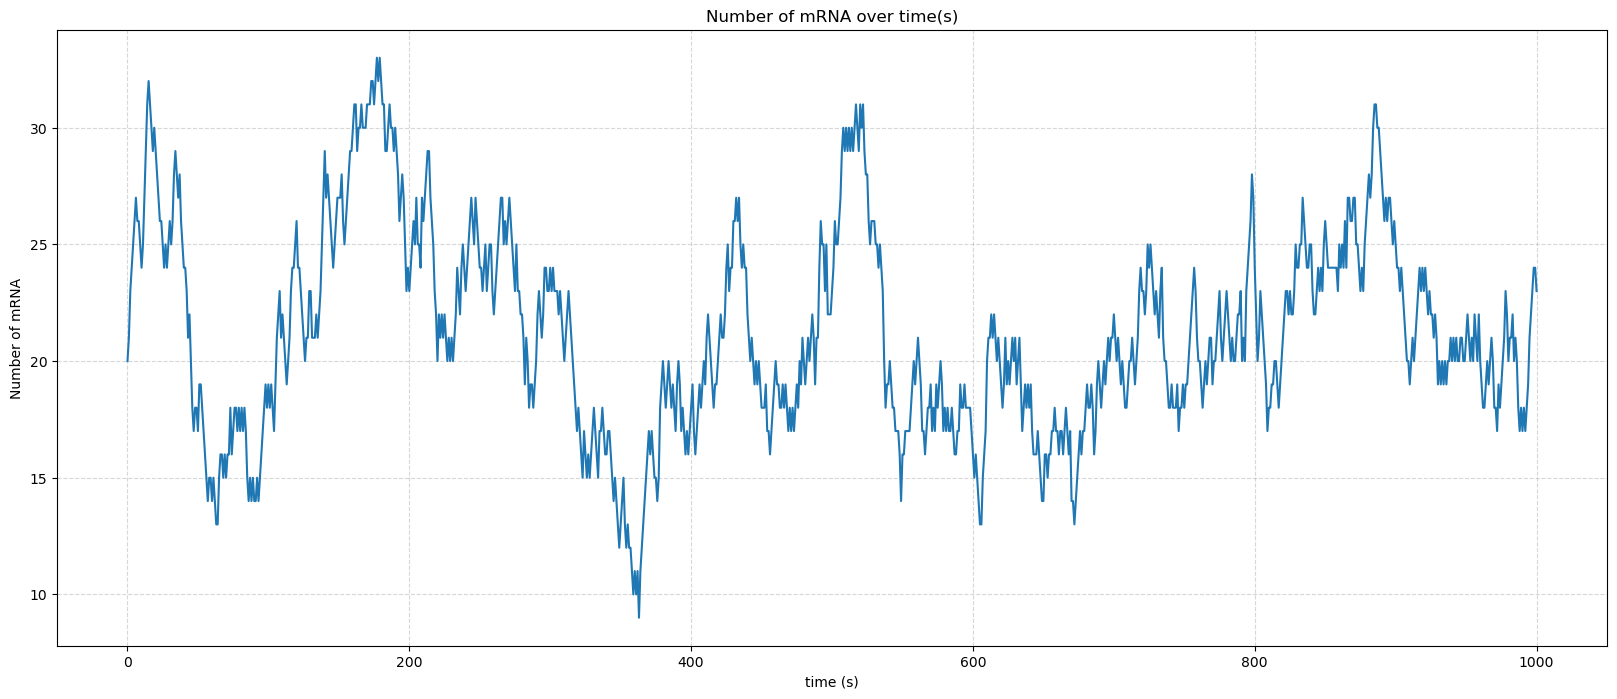

The average value of mRNA is 21.226773226773226
The variance of mRNA is 18.5869355419805
The Fano factor is 0.8756364117809902


In [4]:
#Set the values of the rates
k0 = 0.2
k1 = 0.01
#Set the stoichiometries 

stoichiometry = [1,-1]

#Make a function to calculate the propensities of synthesis (k0) and degradation (k1).

def propensities(x):
    return[k0,k1*x] # Here we assume that cell size = 1. 

# Now let us define a function for the reaction times. We need to make sure that s does not equal to 0 and so we set s 
#to infinity. This is equivalent to an infinitely small number without being 0.

def reaction_times(x):
    a = propensities(x)
    aInv = [1/s if s>0 else np.inf for s in a]
    return -np.log(rand(2)) * aInv
reaction_times(1000)

# We now define the function for each step of the stoichometric simulation

def ssa_step(x,tIn,tOut):
    t = tIn
    while t<tOut:
        rt = reaction_times(x)
        idx = np.argmin(rt)
        tau = np.min(rt)
        x+= stoichiometry[idx]
        t+= tau
    return x
# Now that the function for each step of the stoichiometric model, we define our starting conditions of dt
# (change in time), x (initial mRNA number), and t (initial time). We define mRNA as equal to an array [x], and 
#time as an array[t].

dt = 1

# Set mRNA initial number (x) to the steady state of 20.

x= 20
t = 0.0

mRNA = [x]
time = [t]

# Now we make a for loop that constantly iterates a 1000 times and calculates a probability of mRNA changing.
for i in range(1000):
    x = ssa_step(x,t,t+dt)
    t += dt
    mRNA.append(x)
    time.append(t)
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(time, mRNA, color='tab:blue',label='P(t) rand')
ax.set_xlabel('time (s)')
ax.set_ylabel('Number of mRNA')
plt.title('Number of mRNA over time(s)')
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.show()

#We now calculate our values for mean of the mRNA array, variation in the array and then divide the variation by the 
#mean to obtain our Fano factor

print("The average value of mRNA is", np.mean(mRNA)) #Calculate the mean of mRNA
print("The variance of mRNA is", np.var(mRNA))       #Calculate the variation in mRNA
print("The Fano factor is",np.var(mRNA)/np.mean(mRNA) ) # Calculate the Fano 

In [ ]:
# PLotting Histograms of Mean Fano variance over a 1000 stochastic models at 100 and a 1000 seconds (figure 5.)

In [5]:
#Set the values of the rates
k0 = 0.2
k1 = 0.01
#Set the stoichiometries 

stoichiometry = [1,-1]

#Make a function to calculate the propensities of synthesis (k0) and degradation (k1).

def propensities(x):
    return[k0,k1*x] # Here we assume that cell size = 1. 

# Now let us define a function for the reaction times. We need to make sure that s does not equal to 0 and so we set s 
#to infinity. This is equivalent to an infinitely small number without being 0.

def reaction_times(x):
    a = propensities(x)
    aInv = [1/s if s>0 else np.inf for s in a]
    return -np.log(rand(2)) * aInv
reaction_times(10)

# We now define the function for each step of the stoichometric simulation

def ssa_step(x,tIn,tOut):
    t = tIn
    while t<tOut:
        rt = reaction_times(x)
        idx = np.argmin(rt)
        tau = np.min(rt)
        x+= stoichiometry[idx]
        t+= tau
    return x

##############################
# We make a new array called Fano
Fano = []
#We set up a nested loop. In the outer-loop we set the initial conditions. "x" is the initial number of mRNA, which we
# set to 20 to reach the steady state, t is the starting time, and dt is the change in time, which is 1. We once again
# set mRNA = [x], and time to equal [t]. We run this outer loop a thousand times, resulting in a 1000 Fano factors. 
for j in range(1000):
    x = 20
    t = 0.0
    dt = 1

    mRNA = [x]
    time = [t]
# In the internal loop we create each Fano Factor measurement. Running the ssa_step function we append onto the mRNA, 
# and time vectors. 
    for i in range(# Either a 100 or a 1000 ):
        x = ssa_step(x,t,t+dt)
        t += dt
        mRNA.append(x)
        time.append(t)
# Outside the internal loop we calculate the mRNA mean (mRNA_mean), mRNA variation (mRNA_var), and we append the 
#division of the mRNA_var/mRNA_mean to the Fano vector. 
    mRNA_mean = np.mean(mRNA)
    mRNA_var = np.var(mRNA)
    Fano.append(mRNA_var/mRNA_mean)
# We then plot the results on a histogram
plt.figure()
plt.histogram(Fano, bins=20, color='c', edgecolor='k', alpha=0.65)
plt.axvline(np.mean(Fano), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(np.mean(Fano)*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(np.mean(Fano)))
Fano_mean = np.mean(Fano)
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.xlabel('Mean Fano factor over a 1000 seconds')
plt.ylabel('Frequency')
plt.title("Distribution of Fano Factor Means")
Fano_var = np.var(Fano)

print("The Fano mean is:",Fano_mean, "The Fano variance is", Fano_var)


SyntaxError: '(' was never closed (3128485519.py, line 49)